In [1]:
import numpy as np

Сначала считываем размерность n, количество матриц k, матрицы D0, D1, D2, параметры равномерного распределеня T1 и T2 и вектор стационарных вероятностей Π(0).

In [2]:
task = open("task.txt", "r")
n = int(task.readline())
k = int(task.readline())
D = []
for j in range(k):
    line = task.readline()
    D.append(np.matrix(line))
print(D)
T1 = float(task.readline())
T2 = float(task.readline())
pi0 = np.matrix(task.readline())

[matrix([[-1.45,  0.2 ,  0.15,  0.1 ],
        [ 0.2 , -2.6 ,  0.1 ,  0.3 ],
        [ 0.2 ,  0.1 , -3.7 ,  0.4 ],
        [ 0.1 ,  0.05,  0.15, -4.3 ]]), matrix([[0.5, 0. , 0. , 0. ],
        [0. , 1. , 0. , 0. ],
        [0. , 0. , 1.5, 0. ],
        [0. , 0. , 0. , 2. ]]), matrix([[0.5, 0. , 0. , 0. ],
        [0. , 1. , 0. , 0. ],
        [0. , 0. , 1.5, 0. ],
        [0. , 0. , 0. , 2. ]])]


D0, D1, D2 - матрицы, описывающие поведение потока. D - список этих матриц

In [3]:
D

[matrix([[-1.45,  0.2 ,  0.15,  0.1 ],
         [ 0.2 , -2.6 ,  0.1 ,  0.3 ],
         [ 0.2 ,  0.1 , -3.7 ,  0.4 ],
         [ 0.1 ,  0.05,  0.15, -4.3 ]]),
 matrix([[0.5, 0. , 0. , 0. ],
         [0. , 1. , 0. , 0. ],
         [0. , 0. , 1.5, 0. ],
         [0. , 0. , 0. , 2. ]]),
 matrix([[0.5, 0. , 0. , 0. ],
         [0. , 1. , 0. , 0. ],
         [0. , 0. , 1.5, 0. ],
         [0. , 0. , 0. , 2. ]])]

In [4]:
e = np.full([n,1], 1)
e_ = np.full([n,1], 0)
e_[0] = 1

In [5]:
I_ = np.matrix(np.diag((e-e_).transpose()[0]))
I = np.matrix(np.diag(e.transpose()[0]))

In [6]:
e_ = e_.transpose()

D_1 - инфинитезиальный генератор процесса

In [7]:
D_1 = sum(D)

In [8]:
D_1

matrix([[-0.45,  0.2 ,  0.15,  0.1 ],
        [ 0.2 , -0.6 ,  0.1 ,  0.3 ],
        [ 0.2 ,  0.1 , -0.7 ,  0.4 ],
        [ 0.1 ,  0.05,  0.15, -0.3 ]])

In [9]:
def find_theta(matr, e):
    D_1e = np.concatenate((matr.transpose(), e.transpose()))
    c = np.concatenate((np.zeros([n,1]), np.matrix(1)))
    theta = np.linalg.lstsq(a = D_1e, b = c)
    theta = theta[0].reshape((1, n))
    return theta

In [10]:
def find_b(T1, T2):
    b = []

    for i in range(1, 5):
        b.append((T2**(i + 1) - T1**(i + 1)) / ((i+1) * (T2 - T1)))
    return b 

находим вектор 𝜃 из системы уравнений: <br>
𝜃𝐷(1) = 0, <br>
𝜃e = 1.

In [11]:
theta = find_theta(D_1, e)

<ipython-input-9-b14f42c2b41d>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta = np.linalg.lstsq(a = D_1e, b = c)


In [12]:
theta

matrix([[0.23870418, 0.14492754, 0.16794544, 0.44842285]])

dD - список производных производящих функций при z = 1

In [13]:
dD = []

In [14]:
dD.append(D_1)

In [15]:
for i in range(4):
    dD.append(np.matrix(np.zeros([n,n])))

In [16]:
for index, matrix in enumerate(D):
    dD[1] += index * matrix
    dD[2] += index * (index - 1) * matrix
    dD[3] += index * (index - 1) * (index - 2) * matrix
    dD[4] += index * (index - 1) * (index - 2) * (index - 3) * matrix

b - список начальных моментов распределения B(t) <br>
T1, T2 - параметры равномерного распределения


In [17]:
b = find_b(T1, T2)

In [18]:
b

[0.19999999999999998, 0.04333333333333333, 0.01, 0.00242]

коэффициент 𝜆 находим из уравнения: <br>
𝜆 = 𝜃𝐷′(1)e,
где 𝐷′(1) = ∑︁k*Dk*z^(k-1)    /сумма от k=0 до k=+inf (кол-во матриц D)

In [19]:
lambda_ = theta * dD[1] * e

In [20]:
lambda_

matrix([[4.23913043]])

In [21]:
def find_A(d_mtrx, b):
    A = []
    A.append(d_mtrx[0])
    A.append(-d_mtrx[1] * b[0])
    A.append((d_mtrx[2] * b[0]**2 + d_mtrx[1] * b[1])/2)
    A.append(-(d_mtrx[3] * b[0]**3 + 3 * d_mtrx[2] * b[0] * b[1] + d_mtrx[1] * b[2])/6)
    A.append((d_mtrx[4] * b[0]**4 + 6 * d_mtrx[3] * b[0]**2 * b[1] + 4 * d_mtrx[2] * b[0] * b[2] + 
              3 * d_mtrx[2] * b[1]**2 + d_mtrx[1] * b[3])/24)
    return A

In [22]:
def find_wr(mtrx, b, lmbd, pi0, I_, I, A, A_):
    p0 = lmbd * pi0 * np.linalg.inv(-mtrx[0])
    w = []
    w.append(theta)
    A_inv = np.linalg.inv(A_)
    w.append(((w[0] * (I + A[1]) - p0) * I_ + w[0] * A[2] * e * e_) * A_inv)
    w.append(-2 * ((w[0] * A[2] - w[1] * (I + A[1])) * I_ + (w[0] * A[3] + w[1] * A[2]) * e * e_) * A_inv)
    w.append(3 * ((2 * w[0] * A[3] - 2 * w[1] * A[2] + w[2] * (I + A[1])) * I_ + 
     (2 * w[0] * A[4] - 2 * w[1] * A[3] + w[2] * A[2]) * e * e_) * A_inv)
    return w

In [23]:
def find_rho(lmbd, b):
    return lmbd * b[0]

In [24]:
def find_v(w, A, lmbd, b, rho):
    v = []
    v.append(np.matrix([1]))
    v.append(((w[0] * A[2] - w[1] * A[1]) * e - lmbd * b[1] / 2)/rho)
    v.append(((-2 * w[0] * A[3] + 2 * w[1] * A[2] - w[2] * A[1]) * e -
              v[0] * lmbd * b[2] / 3 - v[1] * lmbd * b[1]) / rho) 
    v.append(((6 * w[0] * A[4] - 6 * w[1] * A[3] + 3 * w[2] * A[2] - w[3] * A[1]) * e - 
              lmbd * (v[0] * b[3] / 4 + v[1] * b[2] + 3 * v[2] * b[1] / 2)) / rho)

    return v

Находим <br>
A0 = D(1);<br>
A1 = −D′(1)b1;<br>
A2 = [D′′ (1)b1^2 + D′(1)b2]/2<br>
A3 =−[D′′′(1)b1^3 +3D′′(1)b1*b2 +D′(1)b3]/6<br>
A4 = [D′′′′(1)b1 + 6D′′′(1)b1^2*b2 + 4D′′(1)b1*b3 + 3D′′(1)b2 + D′(1)b4]/24<br>

A=A0I+(I+A1)eeˆ.

In [25]:
A = find_A(dD, b)

In [26]:
A_ = A[0] * I_ + (I + A[1]) * e * e_

In [27]:
A

[matrix([[-0.45,  0.2 ,  0.15,  0.1 ],
         [ 0.2 , -0.6 ,  0.1 ,  0.3 ],
         [ 0.2 ,  0.1 , -0.7 ,  0.4 ],
         [ 0.1 ,  0.05,  0.15, -0.3 ]]),
 matrix([[-0.3,  0. ,  0. ,  0. ],
         [ 0. , -0.6,  0. ,  0. ],
         [ 0. ,  0. , -0.9,  0. ],
         [ 0. ,  0. ,  0. , -1.2]]),
 matrix([[0.0525, 0.    , 0.    , 0.    ],
         [0.    , 0.105 , 0.    , 0.    ],
         [0.    , 0.    , 0.1575, 0.    ],
         [0.    , 0.    , 0.    , 0.21  ]]),
 matrix([[-0.00683333, -0.        , -0.        , -0.        ],
         [-0.        , -0.01366667, -0.        , -0.        ],
         [-0.        , -0.        , -0.0205    , -0.        ],
         [-0.        , -0.        , -0.        , -0.02733333]]),
 matrix([[0.00071931, 0.        , 0.        , 0.        ],
         [0.        , 0.00143861, 0.        , 0.        ],
         [0.        , 0.        , 0.00215792, 0.        ],
         [0.        , 0.        , 0.        , 0.00287722]])]

In [28]:
A_

matrix([[ 0.7 ,  0.2 ,  0.15,  0.1 ],
        [ 0.4 , -0.6 ,  0.1 ,  0.3 ],
        [ 0.1 ,  0.1 , -0.7 ,  0.4 ],
        [-0.2 ,  0.05,  0.15, -0.3 ]])

Находим Wr, r =0,1,2,3


In [29]:
w = find_wr(D, b, lambda_, pi0, I_, I, A, A_)

In [30]:
w

[matrix([[0.23870418, 0.14492754, 0.16794544, 0.44842285]]),
 matrix([[0.3770262 , 0.25459632, 0.39403911, 1.28395608]]),
 matrix([[-0.24241463, -0.03554588,  0.53537122,  2.93721097]]),
 matrix([[ 7.77443926,  7.81367373, 10.93509092, 36.49745002]])]

находим
\begin{align} 
\rho = \lambda b_1\\
\end{align}

In [31]:
rho = find_rho(lambda_, b)

In [32]:
rho

matrix([[0.84782609]])

In [33]:
v = find_v(w, A, lambda_, b, rho)

In [34]:
v

[matrix([[1]]),
 matrix([[2.61583115]]),
 matrix([[4.96900038]]),
 matrix([[72.58331166]])]

In [58]:
np.linspace(T1, T1 + 1/float(lambda_), 10)

array([0.1       , 0.12621083, 0.15242165, 0.17863248, 0.2048433 ,
       0.23105413, 0.25726496, 0.28347578, 0.30968661, 0.33589744])

In [299]:
deltaT = []
W = []
V = []

In [300]:
h = 1/float(lambda_)

In [301]:
h

0.23589743589743598

In [302]:
for t2 in np.linspace(0.01, h+1, 100):
    b = find_b(T1, T1 + t2)
    A = find_A(dD, b)
    A_ = A[0] * I_ + (I + A[1]) * e * e_
    w = find_wr(D, b, lambda_, pi0, I_, I, A, A_)
    v = find_v(w, A, lambda_, b, rho)
    deltaT.append(t2)
    W.append(w[1].tolist()[0])
    V.append(float(v[1]))

In [303]:
%matplotlib inline
from matplotlib import pyplot as plt
from cycler import cycler
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

In [304]:
%matplotlib inline
from matplotlib import pyplot as plt
from cycler import cycler

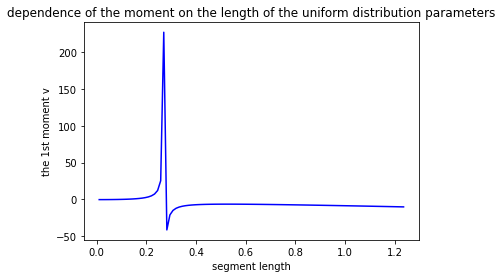

In [305]:

ax = plt.gca()
ax.set_prop_cycle(cycler('color', 
                          ['b', 'r', 'g', 'c', 'k', 'y', 'm']))

ax.plot(deltaT, V)
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('segment length')
plt.ylabel('the 1st moment v')
plt.title('dependence of the moment on the length of the uniform distribution parameters')
plt.axis('tight')
plt.show();

In [306]:
h

0.23589743589743598

In [309]:
w[1]

matrix([[-5.58457281, -1.60738338, -0.74514599,  0.56106402]])

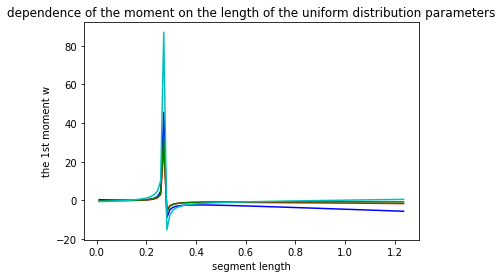

In [307]:

ax = plt.gca()
ax.set_prop_cycle(cycler('color', 
                          ['b', 'r', 'g', 'c', 'k', 'y', 'm']))

ax.plot(deltaT, W)
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('segment length')
plt.ylabel('the 1st moment w')
plt.title('dependence of the moment on the length of the uniform distribution parameters')
plt.axis('tight')
plt.show();